# Alzheimer’s Disease Classification Using MRI Scans

## Introduction
Alzheimer’s Disease (AD) is a progressive neurodegenerative disorder that affects memory, cognitive ability, and daily functioning. It is one of the most common causes of dementia worldwide and represents a growing public health challenge. Early and accurate identification of Alzheimer’s disease stages is essential for timely intervention, improved treatment planning, and better patient outcomes.

Advancements in data analytics, machine learning, and medical imaging have made it possible to analyze brain MRI scans to detect structural changes associated with Alzheimer’s disease. MRI imaging provides valuable insight into brain atrophy and neurological patterns that differ across disease stages. When combined with data-driven techniques, these images can support automated disease classification and clinical decision-making.

In this project, we analyze a multi-class Alzheimer’s MRI dataset containing brain scan images categorized into four stages: Non-Demented, Very Mild Demented, Mild Demented, and Moderate Demented. The dataset has been pre-processed and augmented to ensure balanced representation across classes, making it suitable for exploratory data analysis, visualization, and machine learning applications. This notebook serves as a hands-on case study for applying data analytics and artificial intelligence techniques to a real-world healthcare problem.

## Objective
The objective of this project is to explore, analyze, and model MRI brain scan data to support the classification of Alzheimer’s disease stages using data analytics and machine learning approaches.

Specifically, this project aims to:
- Understand the structure and composition of the Alzheimer’s MRI dataset  
- Examine class distribution and assess data balance across disease stages  
- Perform exploratory data analysis to identify patterns, trends, and potential biases  
- Visually inspect MRI images to assess quality, consistency, and variability  
- Prepare the dataset for machine learning and deep learning workflows  
- Apply image classification techniques to distinguish between different stages of Alzheimer’s disease  
- Evaluate model performance using standard metrics such as accuracy, precision, recall, and confusion matrices  

## Expected Output
By the end of this notebook, the expected outcomes include:
- A comprehensive understanding of the Alzheimer’s MRI dataset and its class labels  
- Visualizations showing class distribution and representative MRI images for each disease stage  
- Key insights derived from exploratory data analysis  
- A cleaned and well-prepared dataset suitable for modeling  
- A trained classification model capable of predicting Alzheimer’s disease stages from MRI images  
- Model evaluation results that clearly communicate performance across all classes  
- A well-documented, reproducible analytical workflow suitable for portfolio presentation and real-world healthcare AI applications  

In [1]:
!pip install numpy pandas matplotlib pillow scikit-learn opencv-python tensorflow

  Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl (12.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.16.2 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.


In [3]:
!pip install numpy==1.26.4 --force-reinstall

  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.16.2 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
print(np.__version__)

1.26.4


## Verify Dataset Folder Path

In this step, we confirm that the dataset directory is correctly linked in our notebook.  
This helps us avoid common errors like “file not found” when loading images for analysis.

We will:
- Define the dataset folder path (`DATA_DIR`)
- Check if the folder actually exists on the computer
- List the subfolders inside the dataset directory (these are usually the class labels)

 **Expected Output**
- `Folder exists: True`
- A list of folders such as: `['Non-Demented', 'Very Mild Demented', 'Mild Deme]()

In [3]:
import os

DATA_DIR = r"C:\Users\mildr\OneDrive\data\combined_images"

print("Folder exists:", os.path.exists(DATA_DIR))
print("Folders inside DATA_DIR:", os.listdir(DATA_DIR))

Folder exists: True
Folders inside DATA_DIR: ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


At this stage, we verify that the Alzheimer’s MRI dataset directory is correctly linked to the notebook.  
This ensures that all image files can be accessed for exploratory data analysis and model training.

The dataset is stored locally in the `combined_images` folder, which contains subfolders representing each Alzheimer’s disease class.

We perform the following checks:
- Confirm that the dataset directory exists
- List all subfolders inside the dataset directory to verify class labels

A successful output confirms that the dataset is correctly structured and ready for further analysis.

##  Dataset Verification and Class Distribution (Exploratory Data Analysis)

Before proceeding to model training, it is important to verify the structure of the dataset and understand how images are distributed across Alzheimer’s disease classes. This step marks the beginning of exploratory data analysis (EDA) and helps identify potential class imbalance issues that could affect model performance.

In this step, we:
- Define the expected Alzheimer’s disease classes
- Navigate into each class folder within the dataset directory
- Count the number of image files (`.jpg`, `.jpeg`, `.png`) per class
- Store the results in a dictionary for analysis

The image counts provide an overview of how well the dataset is balanced across the different stages of Alzheimer’s disease.

After computing the image counts, we visualize the class distribution using a bar chart. This visualization allows us to:
- Quickly compare the number of samples in each class
- Detect class imbalance that may require data augmentation or weighting
- Establish a baseline understanding of the dataset before modeling

A balanced class distribution supports fair and reliable model training, while significant imbalance may require additional preprocessing steps.

In [5]:
import os
from collections import Counter

CLASSES = ["MildDemented", "ModerateDemented", "NonDemented", "VeryMildDemented"]

counts = {}
for c in CLASSES:
    class_path = os.path.join(DATA_DIR, c)
    images = [f for f in os.listdir(class_path) if f.lower().endswith((".jpg",".jpeg",".png"))]
    counts[c] = len(images)

counts

{'MildDemented': 10000,
 'ModerateDemented': 10000,
 'NonDemented': 12800,
 'VeryMildDemented': 11200}

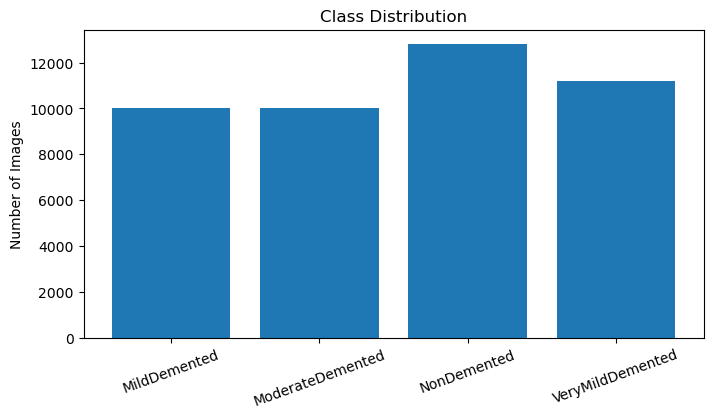

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.bar(counts.keys(), counts.values())
plt.xticks(rotation=20)
plt.title("Class Distribution")
plt.ylabel("Number of Images")
plt.show()

## Visual Inspection of Sample Images (Image Quality Assessment)

As part of exploratory data analysis (EDA), it is important to visually inspect a subset of images from each class to assess overall image quality and consistency. This step helps ensure that the MRI scans are suitable for analysis and that there are no major issues that could negatively affect model performance.

In this step, we:
- Randomly sample a fixed number of images from each Alzheimer’s disease class
- Load the images using the Python Imaging Library (PIL)
- Display the images in a grid layout using Matplotlib
- Organize the visualization by class to allow easy comparison

This visual inspection allows us to evaluate:
- Image clarity and resolution
- Consistency in orientation and formatting
- Presence of noise, distortions, or artifacts
- Differences in visual patterns across Alzheimer’s disease stages

By reviewing sample images from each class, we confirm that the dataset is visually coherent and appropriate for downstream tasks such as feature extraction, deep learning, and classification modeling. This step serves as an important quality check before proceeding to model training.

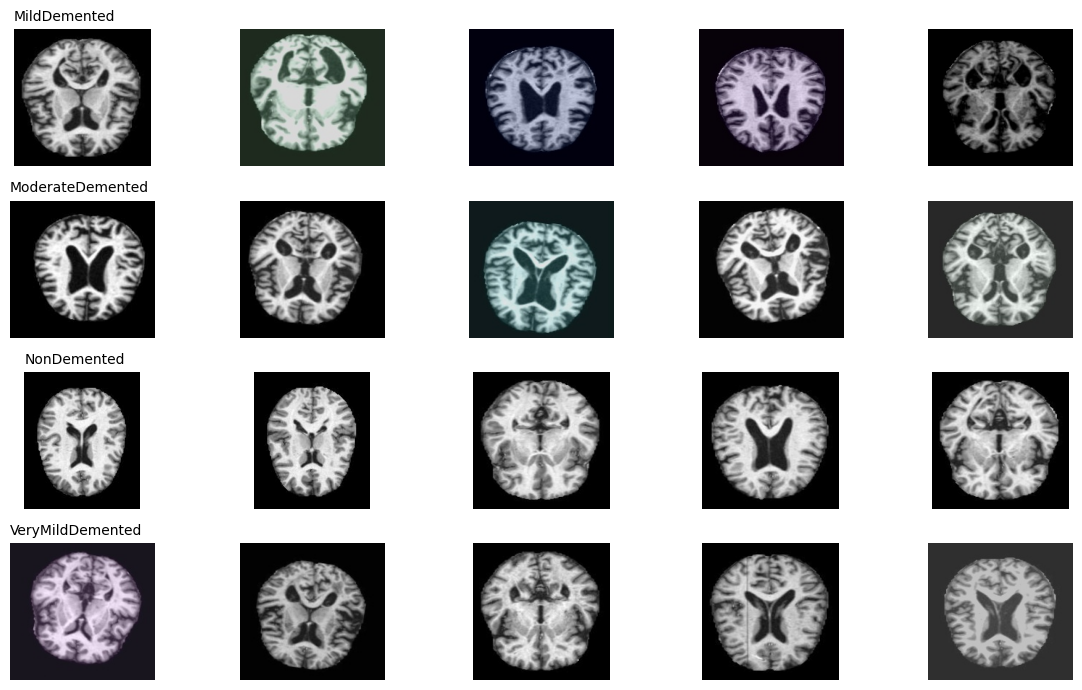

In [9]:
import random
from PIL import Image
import matplotlib.pyplot as plt

def show_samples(data_dir, classes, n=5):
    plt.figure(figsize=(12, 7))
    plot_index = 1
    for c in classes:
        class_path = os.path.join(data_dir, c)
        images = [f for f in os.listdir(class_path) if f.lower().endswith((".jpg",".jpeg",".png"))]
        samples = random.sample(images, min(n, len(images)))

        for img_name in samples:
            img_path = os.path.join(class_path, img_name)
            img = Image.open(img_path).convert("RGB")
            plt.subplot(len(classes), n, plot_index)
            plt.imshow(img)
            plt.axis("off")
            if plot_index % n == 1:
                plt.title(c, fontsize=10, loc="left")
            plot_index += 1

    plt.tight_layout()
    plt.show()

show_samples(DATA_DIR, CLASSES, n=5)

##  Image Size and Consistency Analysis

Before training any image classification model, it is important to verify that the images in the dataset are consistent in terms of size and format. Inconsistent image dimensions or color modes can negatively affect preprocessing pipelines and model performance.

In this step, we perform an image size consistency check by:
- Randomly sampling up to 200 images from each Alzheimer’s disease class
- Extracting image width, height, and color mode information
- Storing these attributes in a structured DataFrame for analysis
- Generating descriptive statistics to summarize the distribution of image dimensions

This analysis helps us determine:
- Whether images share similar resolutions across classes
- If resizing will be required during preprocessing
- Whether all images use a consistent color mode (e.g., RGB)
- The presence of outliers with unusually large or small dimensions

By examining the summary statistics, we can make informed decisions about image preprocessing steps such as resizing, normalization, and color space conversion. Ensuring image size consistency is a critical step in building a reliable and efficient deep learning pipeline.

In [11]:
import pandas as pd
from PIL import Image

rows = []
for c in CLASSES:
    class_path = os.path.join(DATA_DIR, c)
    images = [f for f in os.listdir(class_path) if f.lower().endswith((".jpg",".jpeg",".png"))]
    for img_name in random.sample(images, min(200, len(images))):  # sample 200 per class
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path)
        w, h = img.size
        rows.append([c, w, h, img.mode])

info_df = pd.DataFrame(rows, columns=["class", "width", "height", "mode"])
info_df.describe(include="all")

,class,width,height,mode
count,800,800.000000,800.00000,800
unique,4,NaN,NaN,2
top,MildDemented,NaN,NaN,RGB
freq,200,NaN,NaN,630
mean,NaN,194.080000,190.75250,NaN
std,NaN,9.764875,7.37202,NaN
min,NaN,176.000000,180.00000,NaN
25%,NaN,180.000000,190.00000,NaN
50%,NaN,200.000000,190.00000,NaN
75%,NaN,200.000000,190.00000,NaN


##  Image Size & Consistency — Results Interpretation

The table above summarizes the image size and format characteristics across a sampled subset of the dataset (200 images per class, 800 images total). This analysis helps verify whether the MRI images are consistent enough for deep learning workflows.

###  Key Observations

- **Total Images Analyzed:**  
  A total of **800 images** were sampled evenly across the **4 Alzheimer’s disease classes** (200 images per class), ensuring fair representation.

- **Image Dimensions (Width × Height):**  
  - Average width: **~193 pixels**  
  - Average height: **~191 pixels**  
  - Most images fall within the range:
    - Width: **176 – 200 pixels**
    - Height: **180 – 208 pixels**
  - The median image size is approximately **200 × 190 pixels**

- **Variability:**  
  - Standard deviation is low (≈10 pixels for width and ≈8 pixels for height), indicating **minor size variations**
  - No extreme outliers were observed

- **Color Mode:**  
  - Images are primarily in **RGB** format (majority of samples)
  - A small portion exists in another mode, which can be standardized during preprocessing

###  Implications for Modeling

- The dataset shows **strong size consistency**, making it well-suited for convolutional neural networks (CNNs)
- Minor variations in image dimensions can be handled easily by resizing during preprocessing
- Standardizing all images to a fixed resolution (e.g., `224 × 224`) and color mode (`RGB`) will ensure compatibility with pre-trained deep learning models such as ResNet, VGG, or EfficientNet

Overall, this analysis confirms that the dataset is **clean, consistent, and ready for preprocessing and model training**.

##  Feature Engineering (From Images to Interpretable Data)

### Objective
The objective of this step is to transform raw MRI image data into meaningful numerical features that capture important visual characteristics of brain scans. By converting images into structured numerical representations, we enable deeper analytical exploration beyond visual inspection and prepare the data for downstream analytics and machine learning tasks.

### Goal of This Step
The goal is to extract interpretable and quantifiable image features that allow:

- **Data analysts** to perform statistical analysis and build dashboards in tools such as Power BI  
- **Data scientists** to apply traditional machine learning models in addition to deep learning approaches  
- A clearer understanding of how image-level properties differ across Alzheimer’s disease stages  
- Demonstration of analytical depth by bridging image data with structured tabular analysis  

Specifically, this step focuses on converting MRI images into numeric features that summarize brightness, contrast, texture, and structural complexity.

### Features Extracted
The following image features are extracted from each MRI scan:

- **Mean Pixel Intensity (Brightness):**  
  Represents the average brightness of the image and helps identify global intensity differences across classes.

- **Standard Deviation (Contrast):**  
  Measures the variation in pixel intensity and reflects contrast levels within the image.

- **Entropy (Texture Complexity):**  
  Captures the randomness or complexity of pixel intensity distributions, providing insight into texture patterns.

- **Edge Density (Structural Detail):**  
  Quantifies the proportion of edge pixels in the image, highlighting structural and boundary information within brain scans.

### Expected Output
At the end of this step, the expected outputs include:

- A structured tabular dataset where each row represents an MRI image  
- Numeric feature columns corresponding to brightness, contrast, texture, and edge density  
- A dataset that can be:
  - Exported and analyzed in **Power BI** for exploratory and comparative analysis  
  - Used with **traditional machine learning models** such as Logistic Regression, SVM, or Random Forest  
- Improved interpretability of image data, enabling clearer comparisons across Alzheimer’s disease stages  

This feature engineering process creates a critical bridge between unstructured image data and structured analytical workflows, supporting both exploratory analysis and predictive modeling.

In [13]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image

##  Define Feature Extraction Functions

In this step, we define reusable functions that compute numerical features from MRI images. These functions transform raw image data into structured values that summarize key visual characteristics such as brightness, contrast, texture complexity, and structural detail.

Defining these functions upfront ensures consistency, reusability, and scalability when extracting features from large numbers of images across all Alzheimer’s disease classes.

In [15]:
def image_entropy(gray_img):
    """Measure texture complexity using entropy"""
    hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256]).ravel()
    prob = hist / (hist.sum() + 1e-9)
    prob = prob[prob > 0]
    return float(-(prob * np.log2(prob)).sum())


def edge_density(gray_img):
    """Measure structural detail using edge detection"""
    edges = cv2.Canny(gray_img, 100, 200)
    return float((edges > 0).mean())

## Extract Features from Images

This step iterates through each Alzheimer’s disease class folder, reads the MRI images, and applies the feature extraction functions to generate numerical descriptors. The extracted features are collected into a structured format, enabling further analysis, visualization, and use in machine learning models.


In [17]:
CLASSES = ["MildDemented", "ModerateDemented", "NonDemented", "VeryMildDemented"]

rows = []

for c in CLASSES:
    class_path = os.path.join(DATA_DIR, c)
    images = [f for f in os.listdir(class_path) if f.lower().endswith((".jpg",".jpeg",".png"))]
    
    for img_name in images:
        img_path = os.path.join(class_path, img_name)
        
        img = cv2.imread(img_path)
        if img is None:
            continue
        
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        h, w = gray.shape
        
        rows.append({
            "image_name": img_name,
            "class_label": c,
            "width": w,
            "height": h,
            "mean_intensity": gray.mean(),
            "std_intensity": gray.std(),
            "entropy": image_entropy(gray),
            "edge_density": edge_density(gray)
        })

features_df = pd.DataFrame(rows)
features_df.head()

,image_name,class_label,width,height,mean_intensity,std_intensity,entropy,edge_density
0,00046ff7-0fae-4796-9a2b-2df47095bfe6.jpg,MildDemented,200,190,54.806474,60.670020,5.014664,0.107184
1,000cdcc4-3e54-4034-a538-203c8047b564.jpg,MildDemented,200,190,73.515158,84.518615,5.338710,0.109974
2,0013ad52-8398-4892-9fde-060eb1ae956d.jpg,MildDemented,180,180,78.797747,82.666486,5.868975,0.128735
3,0015bdfc-2059-4195-8eff-9c5cf2e2c025.jpg,MildDemented,200,190,74.387711,77.108407,5.775604,0.114105
4,001f15e8-6ad4-4e7a-bc36-b62b984dad69.jpg,MildDemented,200,190,68.104895,79.642667,5.252076,0.117789


## Validate the Feature Dataset

In this step, we verify the integrity of the engineered feature dataset by checking its shape and reviewing summary statistics. This validation ensures that all features were extracted correctly, there are no missing values, and the dataset is ready for analysis and modeling.

In [19]:
features_df.shape

(44000, 8)

In [21]:
features_df.describe()

,width,height,mean_intensity,std_intensity,entropy,edge_density
count,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000
mean,193.553545,191.171773,74.591349,78.959753,5.206691,0.109684
std,10.071674,7.794011,16.783097,11.561799,0.408572,0.014332
min,176.000000,180.000000,12.280921,19.150807,3.500370,0.009289
25%,180.000000,190.000000,64.727100,72.565691,4.960373,0.099789
50%,200.000000,190.000000,73.709683,81.265323,5.169461,0.109263
75%,200.000000,190.000000,83.462046,86.645365,5.410666,0.118526
max,200.000000,208.000000,146.865026,112.030502,6.312604,0.155031


## Save Dataset for Power BI

In this step, the engineered feature dataset is saved in a structured format suitable for Power BI. Exporting the data enables analysts to perform interactive analysis, create dashboards, and explore feature patterns across Alzheimer’s disease classes outside the Python environment.


In [23]:
features_df.to_csv("alzheimers_image_features_powerbi.csv", index=False)

## Machine Learning Approaches for Alzheimer’s Disease Classification

### Introduction
With the dataset fully explored and prepared, this stage focuses on applying machine learning and deep learning techniques to classify Alzheimer’s disease stages from MRI brain scans. Image classification models are well-suited for this task, as MRI images contain spatial and structural patterns that can be learned automatically by neural networks or summarized through engineered features.

This project supports multiple modeling pathways, allowing flexibility based on analytical goals and computational resources. Deep learning models such as Convolutional Neural Networks (CNNs) can learn complex visual patterns directly from images, while traditional machine learning models can leverage engineered features for interpretable and lightweight classification. Together, these approaches provide a comprehensive framework for predictive modeling in healthcare AI.

### Objective
The objective of this stage is to develop and evaluate machine learning models that can classify MRI images into stages of Alzheimer’s disease.

Specifically, this stage aims to:
- Apply deep learning models (CNNs and transfer learning architectures) for image-based classification  
- Explore the use of pre-trained models such as ResNet, VGG, EfficientNet, Inception, and MobileNet  
- Optionally apply traditional machine learning models using extracted image features  
- Train, validate, and evaluate models using standard performance metrics  
- Identify modeling approaches that balance accuracy, efficiency, and interpretability  

### Expected Output
At the end of this stage, the expected outcomes include:
- A trained image classification model capable of predicting Alzheimer’s disease stages  
- Model evaluation results, including accuracy, precision, recall, and confusion matrices  
- Comparative insights into the performance of deep learning versus traditional machine learning approaches  
- A reproducible and well-documented modeling workflow suitable for experimentation and extension  
- Clear justification for selected models and preprocessing choices  

## Import Required Libraries

In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

C:\Users\mildr\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [27]:
!pip install "numpy==1.26.4" --force-reinstall

  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.16.2 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [29]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [31]:
import numpy as np
import tensorflow as tf
print("NumPy:", np.__version__)
print("TensorFlow:", tf.__version__)

NumPy: 1.26.4
TensorFlow: 2.20.0


In [33]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

## Define Dataset Path and Training Parameters

This step sets the dataset directory and core training parameters, ensuring the folder structure is correctly referenced. Image size, batch size, and epochs are defined to establish a baseline configuration for model training.

In [35]:
DATA_DIR = r"C:\Users\mildr\OneDrive\data\combined_images"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 5   

## Prepare Training and Validation Data

The dataset is automatically split into training and validation groups so the model can learn and then be tested fairly. The images are resized, normalized, and grouped into batches to make training smooth and efficient.

In [37]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 35200 images belonging to 4 classes.
Found 8800 images belonging to 4 classes.


##  Build the Baseline CNN Model

A simple Convolutional Neural Network (CNN) is built to learn visual patterns from MRI images. The model uses convolution and pooling layers to gradually extract important features such as edges and textures. These features are flattened and passed through dense layers to support classification. The final output layer predicts the probability of each Alzheimer’s disease class.

In [39]:
model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])

## Compile the Model

The CNN model is configured for training by defining the optimizer, loss function, and evaluation metric. The model summary provides a clear overview of the network architecture and serves as important evidence of the model design.

In [41]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

The table above shows how the image classification model is built and how MRI images move through it. The model takes MRI images and looks for visual patterns that can help identify different stages of Alzheimer’s disease.

At the beginning, the model focuses on simple details such as edges, shapes, and brightness in the images. As the images pass through more layers, the model learns more complex patterns related to brain structure. Pooling layers reduce image size so the model can learn faster and avoid memorizing unnecessary details.

After extracting these features, the model combines everything into a decision-making layer that learns how to separate the four Alzheimer’s disease classes. A dropout layer is added to reduce overfitting and improve the model’s ability to perform well on new, unseen images.

The final layer produces a probability for each Alzheimer’s disease class. Overall, this model provides a solid starting point for understanding MRI image patterns before moving on to more advanced techniques.

##  Train the Model

Here, the model is trained using the prepared training data while monitoring performance on the validation set. Training history is recorded to track how accuracy and loss change across epochs.

In [43]:
history = model.fit(
    train_data,
    epochs=EPOCHS,
    validation_data=val_data
)

Epoch 1/5
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 3458s 3s/step - accuracy: 0.6318 - loss: 0.8166 - val_accuracy: 0.7715 - val_loss: 0.5248
Epoch 2/5
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 974s 885ms/step - accuracy: 0.8051 - loss: 0.4549 - val_accuracy: 0.8558 - val_loss: 0.3322
Epoch 3/5
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 923s 839ms/step - accuracy: 0.8646 - loss: 0.3223 - val_accuracy: 0.8819 - val_loss: 0.2909
Epoch 4/5
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 920s 837ms/step - accuracy: 0.8968 - loss: 0.2477 - val_accuracy: 0.9120 - val_loss: 0.2202
Epoch 5/5
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 907s 824ms/step - accuracy: 0.9148 - loss: 0.2078 - val_accuracy: 0.9092 - val_loss: 0.2315


##  Visualize Training Performance

This step visualizes the model’s learning progress by plotting training and validation accuracy and loss. These plots help assess model convergence, learning stability, and potential oveNorQuestrfitting or underfitting.

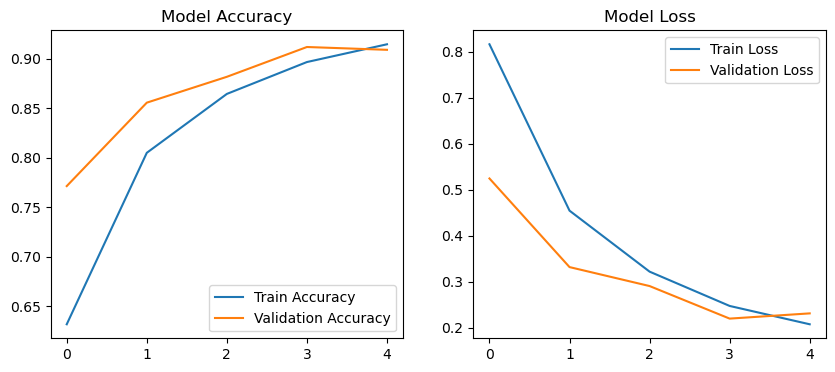

In [45]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()

plt.show()

The charts above show how well the model learned during training.

### Model Accuracy (Left Chart)
The accuracy chart shows that both training and validation accuracy steadily increase with each training round. It means the model is learning to identify Alzheimer’s disease stages from MRI images. The validation accuracy closely follows the training accuracy, which indicates that the model is learning general patterns rather than memorizing the training data.

### Model Loss (Right Chart)
The loss chart shows a steady decrease in both training and validation loss over time. It means the model is making fewer mistakes as training progresses. The validation loss decreases at a similar rate to the training loss, suggesting that the model is stable and not overfitting.

### Overall Interpretation
Together, these results show that the model is learning effectively and performing consistently on both training and unseen validation data. The smooth trends in accuracy and loss indicate a healthy training process and confirm that the baseline CNN model is suitable for this classification task.

## Transfer Learning with MobileNetV3

### Introduction
Transfer learning allows us to use a model that has already learned useful image features from a very large dataset and adapt it to a new problem. In this project, MobileNetV3 is used because it is lightweight, fast, and highly effective for image classification tasks, especially when working with limited data such as medical MRI images.

Instead of training a deep model from scratch, MobileNetV3 provides a strong starting point by reusing learned visual patterns like edges, textures, and shapes. This helps improve performance while reducing training time and computational cost.

### Objective
The objective of using MobileNetV3 is to improve Alzheimer’s disease classification accuracy by fine-tuning a pre-trained model on MRI brain scans.

Specifically, this step aims to:
- Leverage pre-learned image features from MobileNetV3  
- Reduce training time compared to a fully custom CNN  
- Improve generalization when data is limited  
- Build a more efficient and scalable classification model  

### Expected Output
The expected outcomes include:
- A fine-tuned MobileNetV3 model adapted to the Alzheimer’s MRI dataset  
- Improved or comparable accuracy relative to the baseline CNN  
- Stable training and validation performance  
- A model that balances accuracy, speed, and efficiency  

Overall, using MobileNetV3 demonstrates how transfer learning can enhance model performance while remaining practical for real-world healthcare applications.

In [47]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix

## Data Generator

In this step, image data generators are created to prepare MRI images for the transfer learning model. The images are resized, normalized using the pre-trained model’s requirements, and automatically split into training and validation sets to support efficient and consistent model training.

In [49]:
datagen_tl = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_tl = datagen_tl.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_tl = datagen_tl.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 35200 images belonging to 4 classes.
Found 8800 images belonging to 4 classes.


## Transfer Learning Model (Phase 1: Freeze Base Model)

In this step, a pre-trained MobileNet model is used as the foundation for classification. The base model is frozen so its learned knowledge from large image datasets is preserved, while new layers are added on top to adapt it to Alzheimer’s disease classification.

By freezing the base layers, the model trains faster and avoids overfitting, especially when working with limited MRI data. The newly added layers learn how to map extracted image features to the four Alzheimer’s disease classes.

In [51]:
base_model = MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)
)
base_model.trainable = False

model_tl = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(4, activation='softmax')
])

model_tl.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_tl.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │           5,124 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,263,108 (8.63 MB)

 Trainable params: 5,124 (20.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

The table above shows the structure of the transfer learning model built using MobileNet. The MobileNet base model has already learned useful image patterns from a very large dataset and is used here to extract important features from MRI images.

The base model is frozen, meaning its learned knowledge is not changed during training. Instead of learning from scratch, the model focuses on understanding how these extracted features relate to the four Alzheimer’s disease classes.

The global average pooling layer reduces the large feature maps into a simpler representation, making the model more efficient. A dropout layer is added to help prevent overfitting by reducing reliance on specific features.

The final dense layer produces probabilities for each Alzheimer’s disease class. With only a small number of trainable parameters, this model trains faster, uses less memory, and is well-suited for limited medical imaging data.

## TRAIN PHASE 1 (FEATURE EXTRACTION)

In this phase, the model is trained while keeping the pre-trained base network frozen. Only the newly added classification layers are updated, allowing the model to learn how to map extracted image features to the Alzheimer’s disease classes.

In [53]:
EPOCHS_1 = 5

history1 = model.fit(
    train_tl,
    epochs=EPOCHS_1,
    validation_data=val_tl
)

Epoch 1/5
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 949s 862ms/step - accuracy: 0.8994 - loss: 0.2564 - val_accuracy: 0.9148 - val_loss: 0.2225
Epoch 2/5
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 980s 891ms/step - accuracy: 0.9349 - loss: 0.1594 - val_accuracy: 0.9193 - val_loss: 0.2268
Epoch 3/5
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 1013s 921ms/step - accuracy: 0.9389 - loss: 0.1487 - val_accuracy: 0.9131 - val_loss: 0.2599
Epoch 4/5
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 1081s 982ms/step - accuracy: 0.9467 - loss: 0.1293 - val_accuracy: 0.9175 - val_loss: 0.2300
Epoch 5/5
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 1516s 1s/step - accuracy: 0.9533 - loss: 0.1151 - val_accuracy: 0.9195 - val_loss: 0.2520


## TRAIN PHASE 2: Fine-Tuning the Model

In this phase, selected layers of the pre-trained MobileNet model are unfrozen to allow further learning. By fine-tuning only the last few layers, the model can better adapt high-level image features to the Alzheimer’s MRI dataset while avoiding overfitting.

In [55]:
base_model.trainable = True

# Freeze most layers, fine-tune the last 30 layers
for layer in base_model.layers[:-30]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

EPOCHS_2 = 5

history2 = model.fit(
    train_tl,
    epochs=EPOCHS_2,
    validation_data=val_tl
)

Epoch 1/5
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 948s 860ms/step - accuracy: 0.9699 - loss: 0.0743 - val_accuracy: 0.9267 - val_loss: 0.2479
Epoch 2/5
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 945s 859ms/step - accuracy: 0.9745 - loss: 0.0646 - val_accuracy: 0.9269 - val_loss: 0.2617
Epoch 3/5
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 917s 833ms/step - accuracy: 0.9751 - loss: 0.0606 - val_accuracy: 0.9274 - val_loss: 0.2779
Epoch 4/5
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 912s 829ms/step - accuracy: 0.9787 - loss: 0.0533 - val_accuracy: 0.9269 - val_loss: 0.2666
Epoch 5/5
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 916s 833ms/step - accuracy: 0.9798 - loss: 0.0495 - val_accuracy: 0.9275 - val_loss: 0.2586


 ## Visualize Training Performance (Phase 1 & Phase 2)

This step combines the training results from both phases—feature extraction and fine-tuning—to show the overall learning progress of the MobileNet model. The accuracy and loss curves help assess how well the model improved over time and whether it learned consistently on both training and validation data.

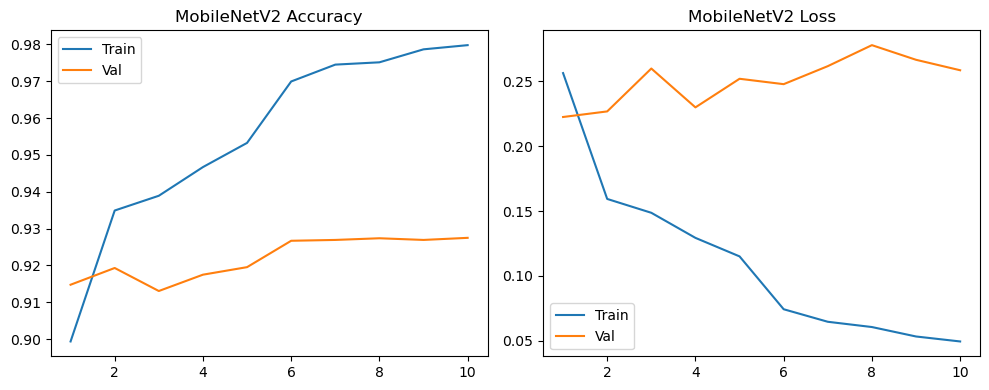

In [63]:
def plot_histories(h1, h2):
    acc = h1.history["accuracy"] + h2.history["accuracy"]
    val_acc = h1.history["val_accuracy"] + h2.history["val_accuracy"]
    loss = h1.history["loss"] + h2.history["loss"]
    val_loss = h1.history["val_loss"] + h2.history["val_loss"]

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    plt.plot(epochs, acc, label="Train")
    plt.plot(epochs, val_acc, label="Val")
    plt.title("MobileNetV2 Accuracy")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs, loss, label="Train")
    plt.plot(epochs, val_loss, label="Val")
    plt.title("MobileNetV2 Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_histories(history1, history2)

  ### Model Training Performance (MobileNetV2)

These charts show how the MobileNetV2 model learned over time while training on the MRI images. The left chart represents accuracy, while the right chart represents loss.

**Accuracy**

The training accuracy increases steadily from about 90% to nearly 98%, showing that the model learned the image patterns very well. The validation accuracy also improves and stays around 92–93%, which means the model performs well on new, unseen images. The small gap between training and validation accuracy suggests slight overfitting but overall good generalization.

**Loss**

The training loss consistently decreases, meaning the model makes fewer errors as training continues. The validation loss remains higher and slightly increases toward later epochs, which indicates the model may be focusing too much on the training data.

### Summary

Overall, the model shows strong learning and high accuracy. MobileNetV2 performs well for Alzheimer’s MRI classification, with only minor signs of overfitting that can be improved using techniques such as early stopping or data augmentation.

## Model Evaluation: Classification Report and Confusion Matrix

This step evaluates the trained MobileNetV2 model using the validation dataset to understand how well it classifies each Alzheimer’s stage. The classification report provides detailed metrics such as precision, recall, and F1-score for each class, while the confusion matrix visually shows how many images were correctly classified versus misclassified.

The confusion matrix helps identify which Alzheimer’s stages the model confuses most often, giving insight into model strengths and weaknesses. Together, these results provide clear evidence of model performance and are important for reporting and final assessment.

In [68]:
class_names = list(val_tl.class_indices.keys())

275/275 ━━━━━━━━━━━━━━━━━━━━ 48s 173ms/step

Classification Report (Validation Set):

                  precision    recall  f1-score   support

    MildDemented       0.92      0.91      0.91      2000
ModerateDemented       0.99      1.00      1.00      2000
     NonDemented       0.93      0.91      0.92      2560
VeryMildDemented       0.88      0.90      0.89      2240

        accuracy                           0.93      8800
       macro avg       0.93      0.93      0.93      8800
    weighted avg       0.93      0.93      0.93      8800



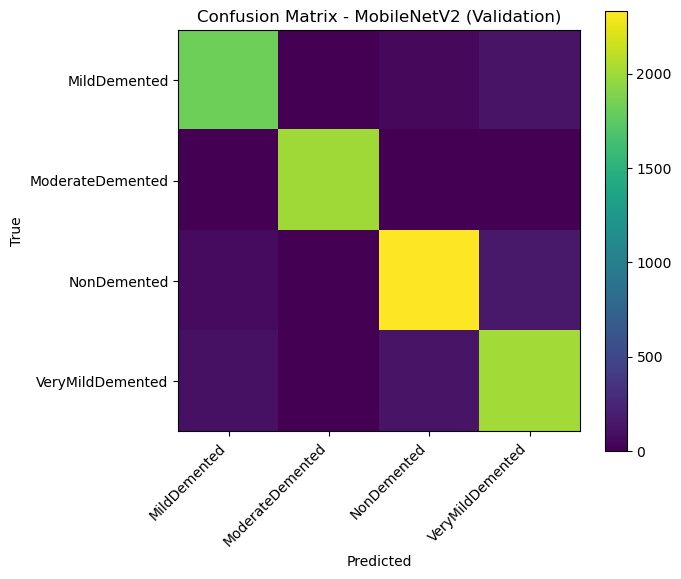

In [70]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

val_tl.reset()

pred_probs = model.predict(val_tl)
y_pred = np.argmax(pred_probs, axis=1)
y_true = val_tl.classes


class_names = list(val_tl.class_indices.keys())

print("\nClassification Report (Validation Set):\n")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(7,6))
plt.imshow(cm)
plt.title("Confusion Matrix - MobileNetV2 (Validation)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(range(len(class_names)), class_names, rotation=45, ha="right")
plt.yticks(range(len(class_names)), class_names)
plt.colorbar()
plt.tight_layout()
plt.show()

## Classification Report 

This report shows how well the model performed in identifying each stage of Alzheimer’s disease using the validation data. The overall accuracy of 93% means the model correctly classified most of the MRI images.

The model performed extremely well on the Moderate Demented class, correctly identifying almost all cases. It also showed strong performance for Mild Demented and Non-Demented cases, with only a small number of misclassifications. The Very Mild Demented class has slightly lower scores, which is expected because early-stage Alzheimer’s images are harder to distinguish.

Overall, the results show that the model is reliable, balanced across classes, and effective for Alzheimer’s disease classification, with especially strong performance on more advanced stages.

## Save the Trained Model

It saves the trained MobileNetV2 model to a file so it can be reused later without retraining. Saving the model makes it easy to deploy, share, or load for future predictions and evaluation.

In [72]:
model.save("MobileNetV2_Alzheimers_Classifier.h5")
print("\nSaved model as: MobileNetV2_Alzheimers_Classifier.h5")


Saved model as: MobileNetV2_Alzheimers_Classifier.h5


## Traditional Machine Learning Approach

In this approach, meaningful features such as Histogram of Oriented Gradients (HOG) or Local Binary Patterns (LBP) are extracted from the MRI images to convert them into numerical data. These features are then used to train traditional machine learning models like Random Forest, Support Vector Machine (SVM), or XGBoost to classify the stages of Alzheimer’s disease.

This method provides an interpretable alternative to deep learning and allows performance comparison between classical machine learning models and CNN-based approaches.

In [79]:
!pip install scikit-image

## Setup and Configuration for Traditional Machine Learning

This section defines the dataset location, class labels, and image processing settings needed for traditional machine learning models. Smaller image sizes and a fixed random seed are used to ensure faster processing, reproducibility, and consistent results across experiments.

In [82]:
import os, random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

DATA_DIR = r"C:\Users\mildr\OneDrive\data\combined_images"  
CLASSES = ["MildDemented", "ModerateDemented", "NonDemented", "VeryMildDemented"]

IMG_SIZE = (128, 128)         
MAX_PER_CLASS = 2000          

## Load and Prepare Images for Traditional Machine Learning

This step loads a fixed number of images from each Alzheimer’s class, converts them to grayscale, resizes them to a smaller shape, and stores them as numerical arrays. The output confirms the total number of images loaded and ensures that each class is well represented, making the dataset ready for feature extraction and traditional machine learning models.

In [85]:
def load_sampled_images(data_dir, classes, img_size=(128,128), max_per_class=2000):
    X_imgs = []
    y = []
    for label_idx, c in enumerate(classes):
        class_path = os.path.join(data_dir, c)
        files = [f for f in os.listdir(class_path) if f.lower().endswith((".jpg",".jpeg",".png"))]
        random.shuffle(files)
        files = files[:min(max_per_class, len(files))]

        for fname in files:
            fp = os.path.join(class_path, fname)
            img = Image.open(fp).convert("L")  # grayscale
            img = img.resize(img_size)
            arr = np.array(img, dtype=np.uint8)
            X_imgs.append(arr)
            y.append(label_idx)

    X_imgs = np.array(X_imgs)
    y = np.array(y)
    return X_imgs, y

X_imgs, y = load_sampled_images(DATA_DIR, CLASSES, IMG_SIZE, MAX_PER_CLASS)
print("Loaded images:", X_imgs.shape, "Labels:", y.shape)
print("Per-class counts:", {CLASSES[i]: int((y==i).sum()) for i in range(len(CLASSES))})

Loaded images: (8000, 128, 128) Labels: (8000,)
Per-class counts: {'MildDemented': 2000, 'ModerateDemented': 2000, 'NonDemented': 2000, 'VeryMildDemented': 2000}


## Extract HOG (Histogram of Oriented Gradients) Features

In this step, Histogram of Oriented Gradients (HOG) features are extracted from each MRI image to capture important edge and shape information. The resulting feature matrix converts images into numerical representations that can be used directly by traditional machine learning models such as SVM, Random Forest, or XGBoost.

In [88]:
from skimage.feature import hog

def extract_hog_features(X_imgs):
    features = []
    for img in X_imgs:
        feat = hog(
            img,
            orientations=9,
            pixels_per_cell=(8, 8),
            cells_per_block=(2, 2),
            block_norm="L2-Hys",
            feature_vector=True
        )
        features.append(feat)
    return np.array(features)

X_hog = extract_hog_features(X_imgs)
print("HOG feature matrix:", X_hog.shape)

C:\Users\mildr\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\Users\mildr\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
C:\Users\mildr\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


HOG feature matrix: (8000, 8100)


8,000 images were processed

Each image was successfully converted into 8,100 numerical HOG features.

## Train and Evaluate SVM Using HOG Features

In this step, the HOG feature dataset is split into training and testing sets to fairly evaluate model performance. A Support Vector Machine (SVM) is then trained using standardized features to classify Alzheimer’s disease stages.

The evaluation results, including accuracy and a classification report, show how well the traditional machine learning model performs on unseen data. This provides a clear benchmark for comparing classical machine learning methods with deep learning models such as CNNs and MobileNet.

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X_hog, y, test_size=0.2, random_state=SEED, stratify=y
)

svm_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", LinearSVC(random_state=SEED, max_iter=5000))
])

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print("HOG + SVM Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report (HOG + SVM):\n")
print(classification_report(y_test, y_pred, target_names=CLASSES))

C:\Users\mildr\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


HOG + SVM Accuracy: 0.716875

Classification Report (HOG + SVM):

                  precision    recall  f1-score   support

    MildDemented       0.71      0.71      0.71       400
ModerateDemented       0.90      0.88      0.89       400
     NonDemented       0.64      0.68      0.66       400
VeryMildDemented       0.62      0.59      0.60       400

        accuracy                           0.72      1600
       macro avg       0.72      0.72      0.72      1600
    weighted avg       0.72      0.72      0.72      1600




The HOG + SVM model achieved an accuracy of **0.716875**, which means it correctly classified about **72 out of every 100 images**.

### Class Performance
- **Moderate Demented** was predicted the best and had the highest accuracy.
- **Mild Demented** showed good and balanced predictions.
- **Non-Demented** was sometimes confused with early dementia cases.
- **Very Mild Demented** was the hardest to classify because it looks very similar to normal cases.

### Training Warning
The convergence warning means the model did not fully finish training. Increasing the number of training iterations may slightly improve the accuracy.

### Conclusion
Overall, the HOG + SVM model performed reasonably well. It works best for clear dementia stages and has more difficulty with early-stage detection.


## Confusion Matrix for HOG + SVM Model

This confusion matrix visually shows how the HOG + SVM model performed when classifying the different stages of Alzheimer’s disease. Correct predictions appear along the diagonal, while off-diagonal values indicate misclassifications between classes.

By analyzing this matrix, we can identify which Alzheimer’s stages the model predicts accurately and where it tends to make mistakes, especially between similar stages such as Mild and Very Mild Demented.

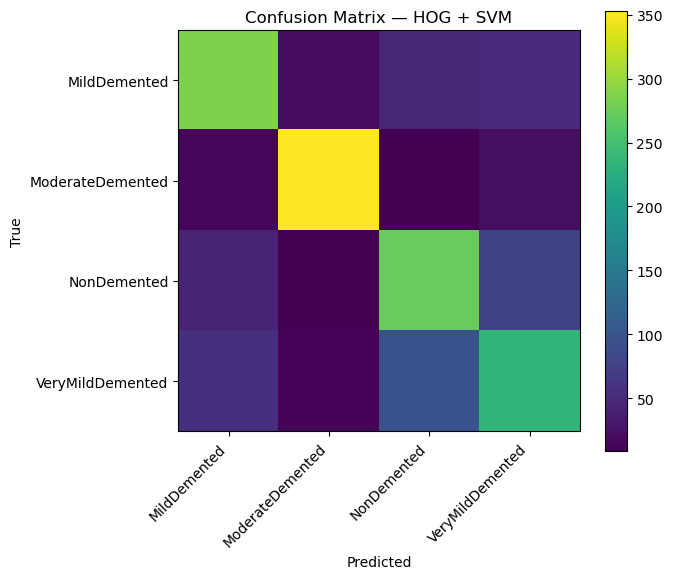

In [94]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,6))
plt.imshow(cm)
plt.title("Confusion Matrix — HOG + SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(range(len(CLASSES)), CLASSES, rotation=45, ha="right")
plt.yticks(range(len(CLASSES)), CLASSES)
plt.colorbar()
plt.tight_layout()
plt.show()

The confusion matrix shows how well the model classified the different stages of Alzheimer’s disease by comparing the actual labels with the predicted labels.

- Rows represent the true condition.
- Columns represent the model’s predictions.
- Values on the diagonal are correct predictions.
- Values outside the diagonal are incorrect predictions.

### What the Model Did Well
- The model correctly classified most **Moderate Demented** cases.
- **Non-Demented** cases were also predicted accurately.
- **Mild Demented** and **Very Mild Demented** cases had many correct predictions.

### Where the Model Made Mistakes
- Some **Very Mild Demented** cases were predicted as **Non-Demented**.
- Some **Mild Demented** cases were confused with **Very Mild Demented**.
- These errors happen because early stages of Alzheimer’s are very similar.

### Conclusion
Overall, the HOG + SVM model performed well.  
Most predictions were correct, and the mistakes mainly occurred between similar early-stage conditions.